In [26]:
df_raw = algo(q_Data)
df_in = df_raw.groupby('adconfiguration_id').filter(lambda x: x.period.nunique()==2)

In [27]:
df = df_in.copy()

In [28]:
df_split = split_df(df)
df_split[df_split['Type']=='All']

,Type,Metric,Control Pre,Control Post,Test Pre,Test Post,Control%ch,Test%ch
5,All,cost,101507.700000,95228.890000,97853.080000,90939.710000,-6.19,-7.07
0,All,clicks,22972.000000,22293.000000,22398.000000,22908.000000,-2.96,2.28
4,All,leads,6253.388491,6278.984169,5989.999779,6469.999858,0.41,8.01
3,All,calls,5635.388503,5723.984172,5372.999756,5918.999855,1.57,10.16
2,All,calls60,3929.287292,3751.984284,3732.999782,3916.999893,-4.51,4.93
1,All,calls120,2432.287310,2315.984368,2317.999900,2362.999967,-4.78,1.94
9,All,cpc,4.418758,4.271695,4.368831,3.969780,-3.33,-9.13
10,All,cpl,16.232431,15.166289,16.336074,14.055597,-6.57,-13.96
6,All,cpl120,41.733433,41.118106,42.214445,38.484855,-1.47,-8.83
11,All,pct_q,43.160952,40.461055,43.141634,39.922285,-6.26,-7.46


In [29]:
pct_cost(df_split, ['Google M', 'Google DT', 'MSN'], 'All')

,Control Pre,Control Post,Test Pre,Test Post
Type,,,,
All,101507.700000,95228.890000,97853.080000,90939.710000
Google M,0.620665,0.628780,0.630370,0.638457
Google DT,0.257134,0.238546,0.252485,0.214049
MSN,0.122201,0.132674,0.117145,0.147494


In [30]:
pct_cost(df_split, ['Google Geo', 'Google Term'], 'Google')

,Control Pre,Control Post,Test Pre,Test Post
Type,,,,
Google,89103.390000,82594.520000,86390.050000,77526.640000
Google Geo,0.615531,0.611813,0.607894,0.528491
Google Term,0.384469,0.388187,0.392106,0.471509


In [31]:
pct_cost(df_split, ['Google M', 'Google DT'], 'Google')

,Control Pre,Control Post,Test Pre,Test Post
Type,,,,
Google,89103.39000,82594.520000,86390.050000,77526.640000
Google M,0.70707,0.724963,0.714013,0.748918
Google DT,0.29293,0.275037,0.285987,0.251082


In [32]:
DF_ACF = df.groupby(['adconfiguration_id', 'target', 'provider', 'period'], as_index=False)[inmetrics].sum()

#Absolute Change

###Bootstrap means, Absolute Changes in Metrics by Provider/Target/Bus Type

In [33]:
df_boots = get_boots(df, 'Abs')

In [34]:
f = lambda x: round((sum(x) / len(x)), 2)
df_boots.groupby(['type', 'experimental']).agg(f)

cpl120  cvr120
type        experimental                
All         Control        -0.66   -0.19
            Test           -3.76   -0.03
Google      Control        -1.20   -0.26
            Test           -4.39    0.23
Google DT   Control         2.98   -0.41
            Test          -15.06    0.90
Google Geo  Control        -2.17    0.09
            Test           -6.23    0.07
Google M    Control        -1.31   -0.72
            Test           -2.11   -0.83
Google Term Control         0.53   -0.88
            Test           -2.03    0.28
MSN         Control         5.74   -0.16
            Test           -0.36    0.05

###Bootstraps Plotted

In [35]:
df_bootplot = get_bootplot(df_boots)

In [36]:
%reload_ext rpy2.ipython

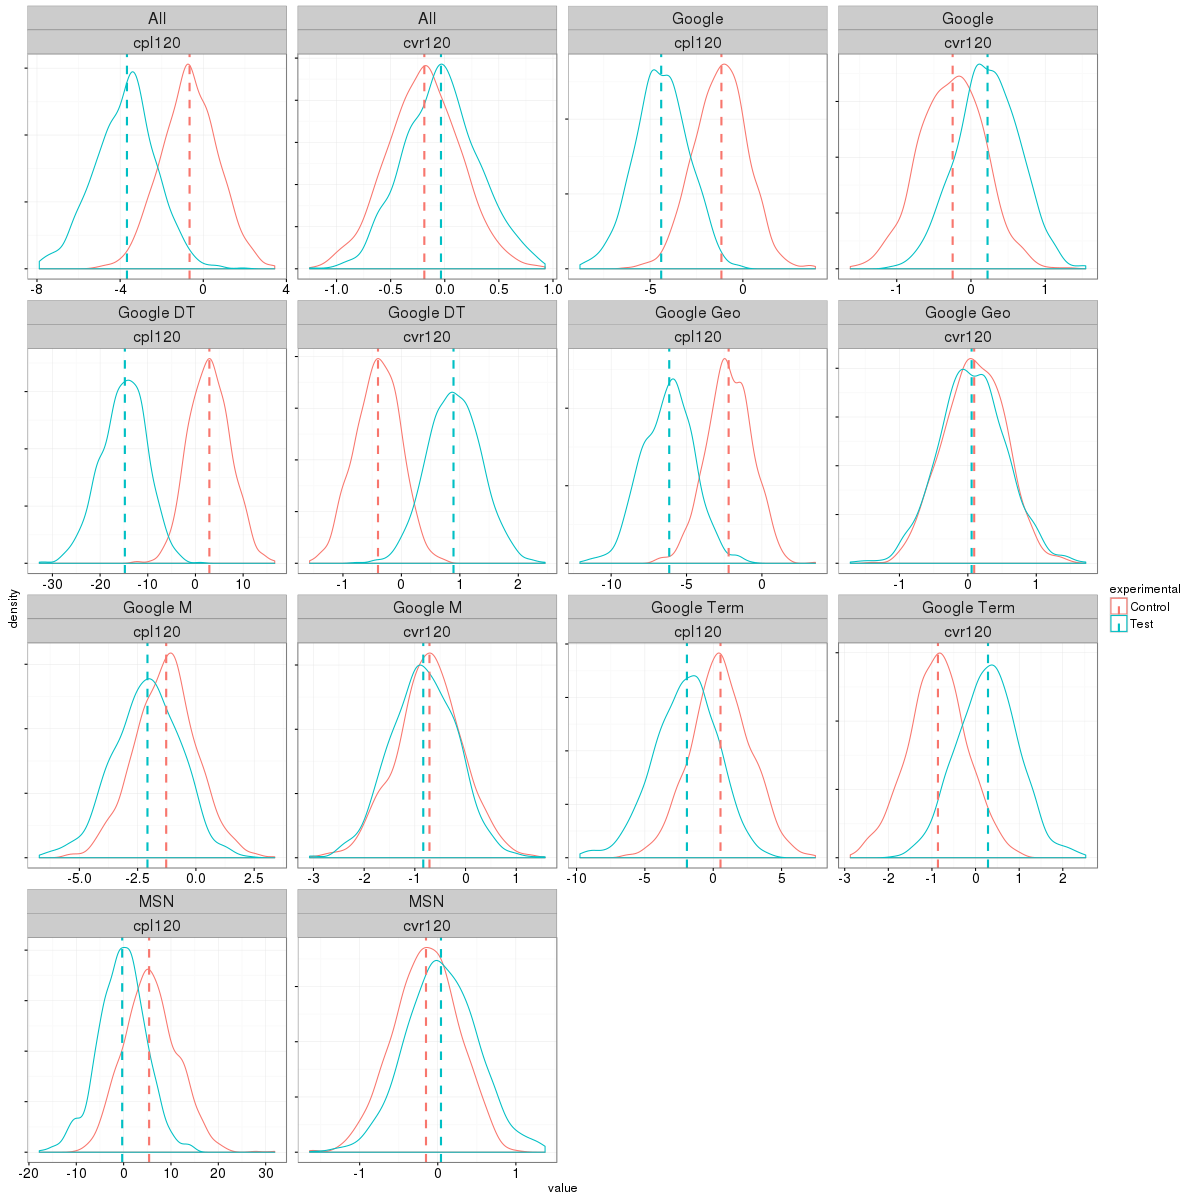

In [38]:
%%R -i df_bootplot -w 1200 -h 1200
library(ggplot2)
library(tidyr)
library(dplyr)
library(magrittr)
library(grid)

df_medians <- df_bootplot[,c('experimental', 'type', 'metric', 'median')]
df_medians <- df_medians[!duplicated(df_medians), ]
rownames(df_medians) <- 1:nrow(df_medians)

ggplot(df_bootplot, aes(x=value)) +
    scale_fill_brewer(palette = "Paired") +
    theme_bw() +
    geom_density(aes(color=experimental)) +
    facet_wrap(type ~ metric, ncol=4, scales='free') +
    theme(axis.text=element_text(size=14),
          axis.text.y=element_text(size=0),
          plot.title=element_text(size=18,face="bold"),
          legend.text=element_text(size=12),
          strip.text=element_text(size=16)) +
      geom_vline(data=df_medians, aes(xintercept=median, color=experimental), linetype="dashed", size=1)

##CPQL, All Groups

In [39]:
pd.options.display.max_rows = 999

In [40]:
df_split[df_split['Metric'].isin(['cpl120', 'cost'])].sort_values(['Type', 'Metric'])

,Type,Metric,Control Pre,Control Post,Test Pre,Test Post,Control%ch,Test%ch
5,All,cost,101507.700000,95228.890000,97853.080000,90939.710000,-6.19,-7.07
6,All,cpl120,41.733433,41.118106,42.214445,38.484855,-1.47,-8.83
5,Google,cost,89103.390000,82594.520000,86390.050000,77526.640000,-7.30,-10.26
6,Google,cpl120,40.384004,39.214062,41.286639,36.946657,-2.90,-10.51
5,Google DT,cost,26101.100000,22716.510000,24706.430000,19465.510000,-12.97,-21.21
6,Google DT,cpl120,60.503073,63.533466,65.089535,50.316012,5.01,-22.70
5,Google Geo,cost,54845.920000,50532.410000,52515.950000,40972.130000,-7.86,-21.98
6,Google Geo,cpl120,40.223866,38.083750,41.956493,35.717833,-5.32,-14.87
5,Google M,cost,63002.290000,59878.010000,61683.620000,58061.130000,-4.96,-5.87
6,Google M,cpl120,35.494211,34.241528,36.011859,33.924622,-3.53,-5.80


##Code

In [25]:
inmetrics = ['clicks', 'calls120', 'calls60', 'calls', 'leads', 'cost']
outmetrics = ['cpl120', 'cvr120']

q_Data = '''
            with clients as (
            select adconfiguration_id, experimental, segment_name
            from control.pilots p 
             join control.client_adconfiguration_map m on p.adconfiguration_id = m.adconfigurationid
             join public.segment_w_name s on m.segment_id = s.segment_id
            where pilotname = 'bid_by_distance_lawyer'
            )
            select clients.adconfiguration_id
                   ,(case when clients.experimental then 'Test' else 'Control' end) as experimental
                   ,clients.segment_name
                   ,(case when map.provider_id = 1 then 'Google_DT' 
                          when map.provider_id = 4 then 'MSN' 
                          when map.provider_id = 18 then 'Google_M' else '' end) as provider
                   ,(case when map.target = 0 then 'Geo' else 'Term' end) as target
                   ,(case when day <= '2016-1-28' then 'Pre' else 'Post' end) as period
                   ,day
                   ,sum(agg.clicks) as clicks
                   ,sum(agg.call) as calls
                   ,sum(agg.call60) as calls60
                   ,sum(agg.call120) as calls120
                   ,sum(agg.leads) as leads
                   ,sum(agg.cost) as cost
                   ,sum(agg.bidfull_cost) as bidfull_cost
            from clients
             join control.listingidmap map on clients.adconfiguration_id = map.adconfiguration_id
             join aggregates.listing_day agg on map.listingid = agg.listing_id
              and agg.day >= '2016-1-1'
              and agg.day <= '2016-2-25'
              and map.provider_id in (1, 4, 18)
              and map.target in (0, 1)
            group by clients.adconfiguration_id, clients.experimental, clients.segment_name, map.target, map.provider_id, period, day
            order by clients.adconfiguration_id, clients.experimental, period, map.provider_id, map.target, day
        '''

d_Prov_Target_Type = {'All': [['Geo', 'Term'], ['Google_M', 'Google_DT', 'MSN'], ['M', 'S']],
                      'Google': [['Geo', 'Term'], ['Google_M', 'Google_DT'], ['M', 'S']],
                      'Google M': [['Geo', 'Term'], ['Google_M'], ['M', 'S']],
                      'Google DT': [['Geo', 'Term'], ['Google_DT'], ['M', 'S']],
                      'Google Geo': [['Geo'], ['Google_DT', 'Google_M'], ['M', 'S']],
                      'Google Term': [['Term'], ['Google_DT', 'Google_M'], ['M', 'S']],
                      'MSN': [['Geo', 'Term'], ['MSN'], ['M', 'S']]}    

d_Metrics = {'cpc': ('cost', 'clicks', 1),
             'cpl': ('cost', 'leads', 1),
             'cpl120': ('cost', 'calls120', 1),
             'cvr': ('leads', 'clicks', 100),
             'cvr120': ('calls120', 'clicks', 100),
             'pct_q': ('calls120', 'calls', 100)}

d_Sort = {'cost': 0, 'clicks': 1, 'leads': 2, 'calls': 3, 'calls60': 4, 'calls120': 5, 
          'cpc': 6, 'cpl': 7, 'cpl120': 8, 'pct_q': 9, 'cvr': 10, 'cvr120': 11}

def sort_rows(df):
    df['_'] = df['Metric'].map(d_Sort)
    df.sort_values('_', inplace=True)
    df.drop('_', axis=1, inplace=True)
    return df

def sort_cols(df):
    cols = ['Type', 'Metric', 'Control Pre', 'Control Post', 'Test Pre', 'Test Post']
    return df[cols]

def filter_df(df, geo_term, mobile_dt):
    return df[(df['target'].isin(geo_term)) 
              & (df['provider'].isin(mobile_dt))]

def pct_ch(df):
    for i in ['Control', 'Test']:
        col = i+'%ch'
        post = i+' Post'
        pre = i+' Pre'
        df[col] = (df[post] - df[pre]) / df[pre] * 100
        df[col] = [round(x, 2) for x in  df[col]]
    return df

def agg_prepost(df, k):
    out = df.groupby(['period', 'experimental'], as_index=False).sum()
    out.index = [str(x['experimental']) + ' ' + str(x['period']) for _, x in out.iterrows()]
    newindex= ['Control Pre', 'Control Post', 'Test Pre', 'Test Post']
    out = out.reindex(newindex)        
    out.drop(['experimental', 'period'], axis=1, inplace=True)
    for m, f in d_Metrics.items():
        out[m] = out[f[0]] / out[f[1]] * f[2]
    out = out.T    
    out['Type'] = k
    out.reset_index(inplace=True)
    out.rename(columns={'index': 'Metric'}, inplace=True)
    out = sort_rows(out)    
    out = sort_cols(out)
    return out

def pct_cost(df, providers, totalprovider):
    df = df[(df['Metric'] == 'cost') & (df['Type'].isin(providers+[totalprovider]))]
    df = df.drop(['Metric', 'Control%ch', 'Test%ch'], axis=1)
    df = df.set_index('Type', drop=True)
    for i in providers:
        df.loc[i] /= df.loc[totalprovider]
    df.sort_values('Control Pre', ascending=False, inplace=True)
    return df 

def split_df(df):
    dfgroups = df.groupby(['target', 'provider', 'experimental', 'period'], as_index=False)[inmetrics].sum()
    dfout = pd.DataFrame(columns = ['Type', 'Metric', 'Control Pre', 'Control Post', 'Test Pre', 'Test Post'])
    for k, v in d_Prov_Target_Type.items():
        out = filter_df(dfgroups, v[0], v[1])
        out = agg_prepost(out, k)
        dfout = pd.concat([dfout, out])
    return pct_ch(dfout)


#Bootstrapping

def randomsample_prepost(l):
    sam = list(np.random.choice(l, len(l)))
    out=[]
    for i in sam:
        out.append([i]+['Pre'])
        out.append([i]+['Post'])            
    return pd.DataFrame(out, columns=['adconfiguration_id', 'period'])

def bootstrapper(clients, target, provider, inmetrics, outmetrics, name, experimental, changetype):  
    dfout = pd.DataFrame(columns=outmetrics)
    df_metrics = DF_ACF[(DF_ACF['target'].isin(target)) & (DF_ACF['provider'].isin(provider))]
    
    it=0
    while it<1000:
        it+=1    
        df_clients = randomsample_prepost(clients)
        out = pd.merge(df_clients, df_metrics, on=['adconfiguration_id', 'period'], how='left').fillna(0)
        out = out[['period'] + inmetrics]
        out = out.groupby('period').sum()
        for k, v in d_Metrics.items():
            out[k] = out[v[0]] / out[v[1]] * v[2]
        out = out[outmetrics]
        if changetype == 'Abs': result = out.T.Post - out.T.Pre
        else: result = (out.T.Post - out.T.Pre) / out.T.Pre
        result = pd.DataFrame(result).T
        dfout = pd.concat([dfout, result])
    
    dfout['type'] = name
    dfout['experimental'] = experimental
    return dfout

def get_boots(df, boottype):
    CONTROL_ACFS = df[df['experimental']=='Control']['adconfiguration_id'].drop_duplicates().tolist()
    TEST_ACFS = df[df['experimental']=='Test']['adconfiguration_id'].drop_duplicates().tolist()
    df_test = pd.DataFrame(columns=[outmetrics +['type']])
    df_control = pd.DataFrame(columns=[outmetrics +['type']])
    for k, v in d_Prov_Target_Type.items():
        a = bootstrapper(TEST_ACFS, v[0], v[1], inmetrics, outmetrics, k, 'Test', boottype)
        df_test = pd.concat([df_test, a])
        a = bootstrapper(CONTROL_ACFS, v[0], v[1], inmetrics, outmetrics, k, 'Control', boottype)
        df_control = pd.concat([df_control, a])
    df_boots = pd.concat([df_test, df_control])
    return df_boots

def get_bootplot(df):
    df = pd.melt(df, id_vars=['experimental', 'type'], var_name='metric')
    medians = df.groupby(['experimental', 'type', 'metric'])['value'].median().to_dict()
    df['median'] = [medians[(x['experimental'], x['type'], x['metric'])] for _, x in df.iterrows()]
    return df